# Import Necessary Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow.compat.v1 
import pandas as pd
housing_data = pd.read_csv('house/housing.csv')  


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

#  Load and Explore the Data



In [9]:


# Load the data
housing_data = pd.read_csv('house/housing.csv')  # Replace with your file path

# Display the first few rows
print(housing_data.head())



   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0       79545.45857             5.682861                   7.009188   
1       79248.64245             6.002900                   6.730821   
2       61287.06718             5.865890                   8.512727   
3       63345.24005             7.188236                   5.586729   
4       59982.19723             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09      23086.80050  1.059034e+06   
1                          3.09      40173.07217  1.505891e+06   
2                          5.13      36882.15940  1.058988e+06   
3                          3.26      34310.24283  1.260617e+06   
4                          4.23      26354.10947  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Eli

In [10]:
print(housing_data.describe())


       Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
count       5000.000000          5000.000000                5000.000000   
mean       68583.108984             5.977222                   6.987792   
std        10657.991214             0.991456                   1.005833   
min        17796.631190             2.644304                   3.236194   
25%        61480.562390             5.322283                   6.299250   
50%        68804.286405             5.970429                   7.002902   
75%        75783.338665             6.650808                   7.665871   
max       107701.748400             9.519088                  10.759588   

       Avg. Area Number of Bedrooms  Area Population         Price  
count                   5000.000000      5000.000000  5.000000e+03  
mean                       3.981330     36163.516039  1.232073e+06  
std                        1.234137      9925.650114  3.531176e+05  
min                        2.000000       172.61

In [11]:
print(housing_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB
None


In [16]:
housing_data.dropna(inplace=True)
#droping all the null values so that the dont cause any problem


In [17]:
print(housing_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB
None


In [18]:
housing_data.columns


Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

# Visualize the Data

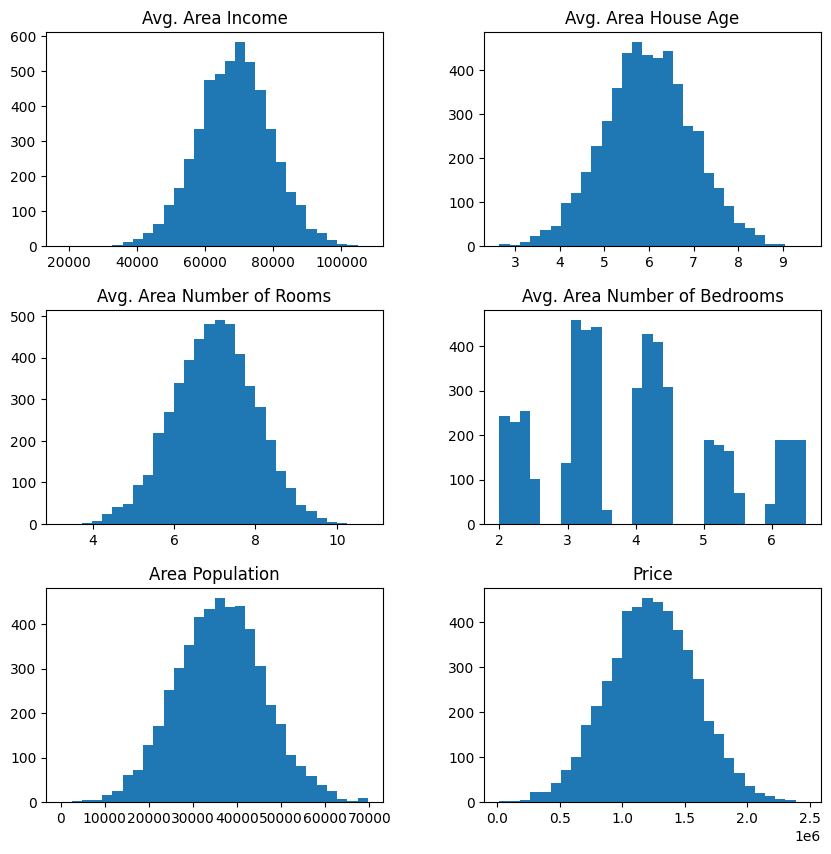

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for each feature
housing_data.hist(bins=30, figsize=(10,10), grid=False)
plt.show()



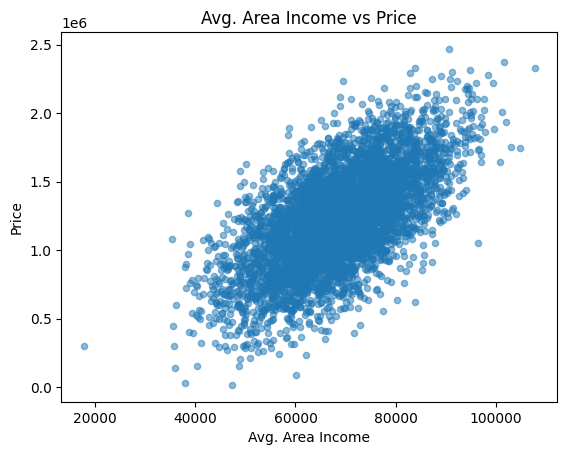

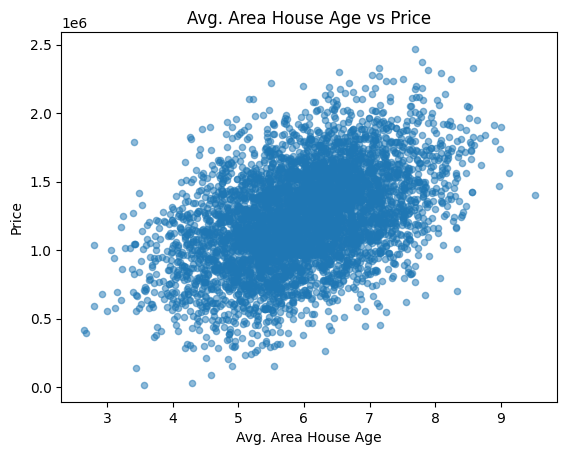

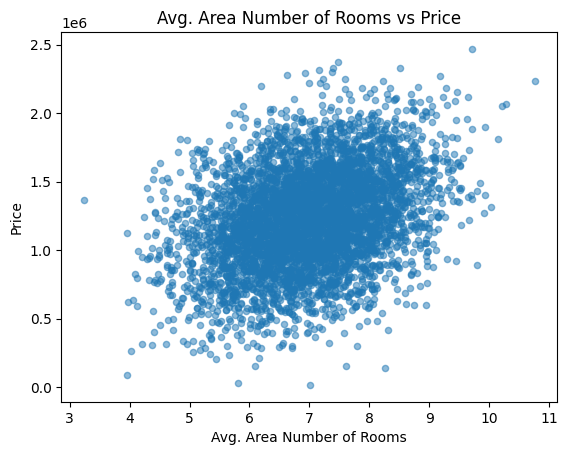

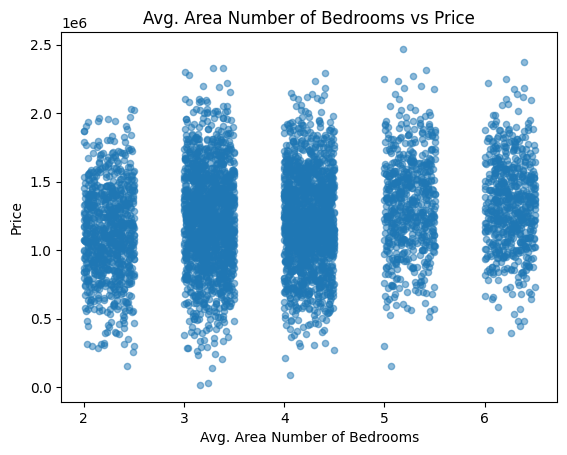

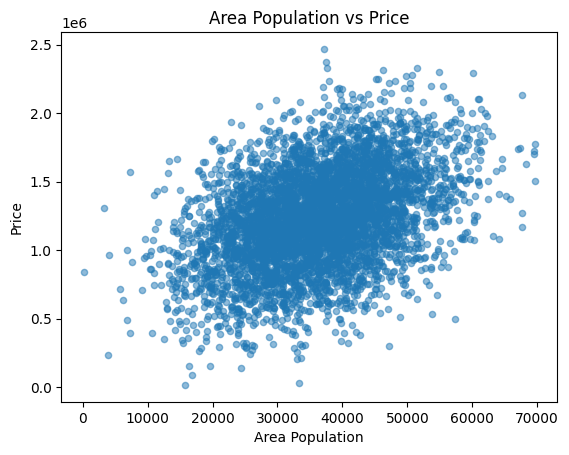

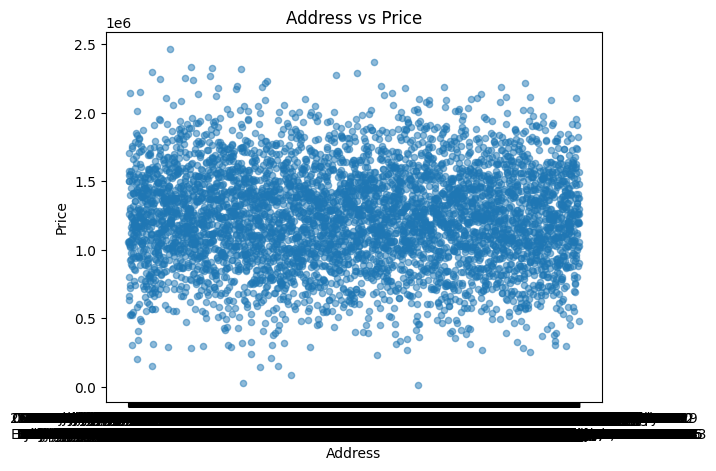

In [14]:
# Scatter plot for each feature vs. Price
for column in housing_data.columns:
    if column != 'Price':
        housing_data.plot(kind='scatter', x=column, y='Price', alpha=0.5)
        plt.title(f'{column} vs Price')
        plt.show()


#  Feature Engineering


In [26]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, PowerTransformer

# Load your dataset


housing_data = pd.read_csv('house/housing.csv')

# Example of creating a new feature: Average Room Size
housing_data['AvgRoomSize'] = housing['Avg. Area Number of Rooms'] / housing_data['Avg. Area Number of Bedrooms']

# Transforming a skewed feature (example: log transformation of 'Area Population')
housing_data['LogAreaPopulation'] = np.log(housing_data['Area Population'] + 1)

# Scaling features
scaler = StandardScaler()
features_to_scale = ['Avg. Area Income', 'AvgRoomSize', 'LogAreaPopulation']  # List your features to scale
housing_data[features_to_scale] = scaler.fit_transform(housing_data[features_to_scale])

# Now your housing DataFrame has new engineered features


# Correlation Analysis


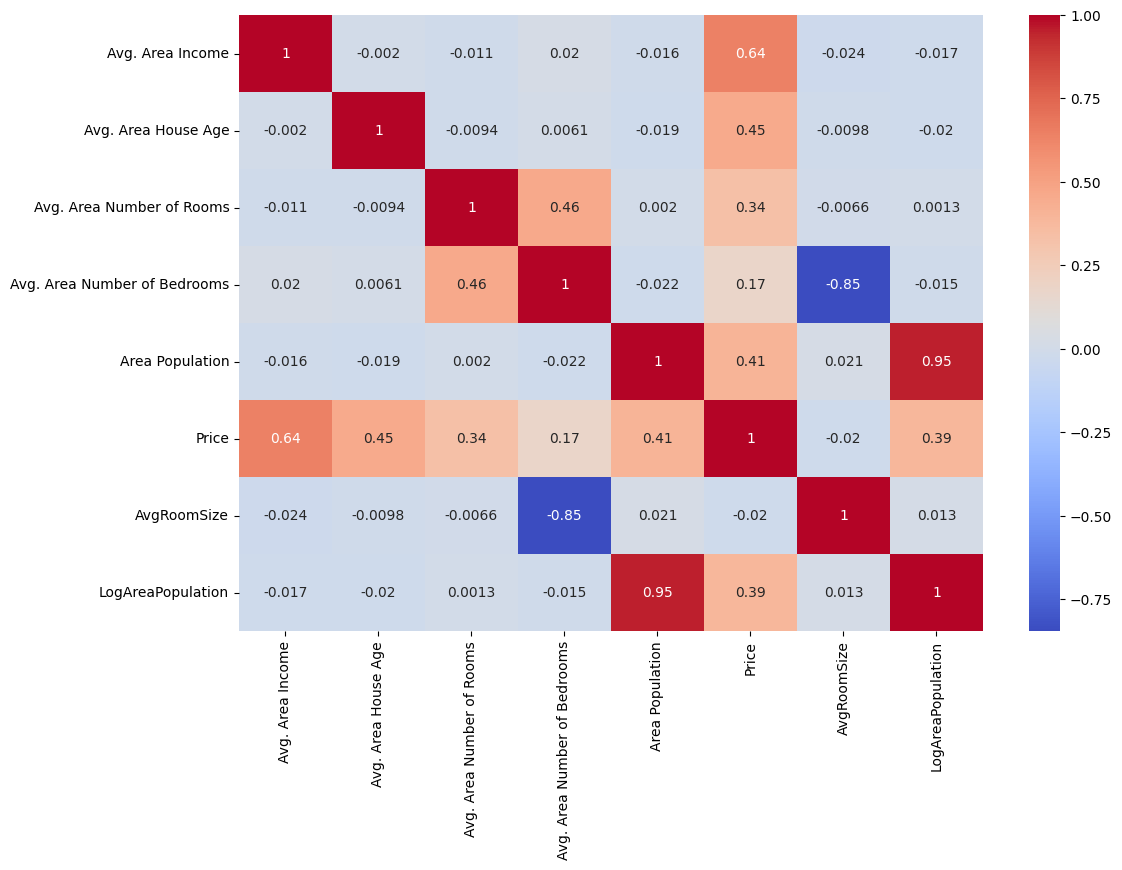

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exclude non-numeric columns
numeric_housing_data = housing_data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_housing_data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Start with your original housing_data DataFrame
housing_with_new_features = housing_data.copy()

# Example of adding a new engineered feature
# Replace 'Avg. Area Number of Rooms' and 'Avg. Area Number of Bedrooms' with actual column names if different
housing_with_new_features['Rooms_per_Bedroom'] = housing_with_new_features['Avg. Area Number of Rooms'] / housing_with_new_features['Avg. Area Number of Bedrooms']

# Now, you can use this updated DataFrame for the model with new features
X_new = housing_with_new_features.select_dtypes(include=[np.number]).drop('Price', axis=1)

# Assuming 'housing_data' is your original DataFrame
# Exclude non-numeric columns from the original dataset
X = housing_data.select_dtypes(include=[np.number]).drop('Price', axis=1)  # Replace 'Price' with your target column name
y = housing_data['Price']  # Replace 'Price' with your target column name

print("Original dataset shapes:", X.shape, y.shape)

# Model with original features
model_original = RandomForestRegressor(random_state=42)
print("Training model with original features...")
scores_original = cross_val_score(model_original, X, y, scoring='neg_mean_squared_error', cv=5)

print("Scores with original features calculated.")

# Exclude non-numeric columns from the dataset with new features
print("New features dataset shapes:", X_new.shape, y.shape)

# Model with new features
model_new = RandomForestRegressor(random_state=42)
print("Training model with new features...")
scores_new = cross_val_score(model_new, X_new, y, scoring='neg_mean_squared_error', cv=5)

print("Scores with new features calculated.")

# Output the average MSE for both models
print("Original Features Avg MSE:", -scores_original.mean())
print("New Features Avg MSE:", -scores_new.mean())


Original dataset shapes: (5000, 7) (5000,)
Training model with original features...
Scores with original features calculated.
New features dataset shapes: (5000, 8) (5000,)
Training model with new features...
Scores with new features calculated.
Original Features Avg MSE: 14687858695.093616
New Features Avg MSE: 14663371695.489508


# Model Selection

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import numpy as np

# Load your dataset (assuming it's a CSV file)
housing_data = pd.read_csv('house/housing.csv')  # Replace with your file path

# Prepare the data (assuming 'Price' is the target variable)
X = housing_data.drop('Price', axis=1).select_dtypes(include=[np.number])  # Exclude non-numeric columns
y = housing_data['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a dictionary of models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    print(f'{name} MSE: {mse}')


Linear Regression MSE: 10089009299.49946
Ridge MSE: 10089716571.163387
Lasso MSE: 10089021395.779215
Random Forest MSE: 14391497208.582758
Gradient Boosting MSE: 11983338273.812109


# Training the Models

# Training with Scikit-learn (Example Random Forest Regressor)


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Load your dataset
housing_data = pd.read_csv('house/housing.csv')  # Replace with your file path
X = housing_data.drop('Price', axis=1).select_dtypes(include=[np.number])  # Replace 'Price' with your target variable
y = housing_data['Price']  # Replace 'Price' with your target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
predictions = rf_model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("Random Forest MSE:", mse)


Random Forest MSE: 14391497208.582758


# Training with TensorFlow(Example Basic Neural Network)

In [5]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Building a neural network model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=X_train_scaled.shape[1:]),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
nn_predictions = model.predict(X_test_scaled)
nn_mse = mean_squared_error(y_test, nn_predictions)
print("Neural Network MSE:", nn_mse)


Epoch 1/10
100/100 [==============================] - 2s 5ms/step - loss: 1636712710144.0000 - val_loss: 1637521162240.0000
Epoch 2/10
100/100 [==============================] - 0s 3ms/step - loss: 1636493557760.0000 - val_loss: 1637072896000.0000
Epoch 3/10
100/100 [==============================] - 0s 3ms/step - loss: 1635646570496.0000 - val_loss: 1635747364864.0000
Epoch 4/10
100/100 [==============================] - 0s 3ms/step - loss: 1633657290752.0000 - val_loss: 1633023557632.0000
Epoch 5/10
100/100 [==============================] - 0s 3ms/step - loss: 1630063296512.0000 - val_loss: 1628499607552.0000
Epoch 6/10
100/100 [==============================] - 0s 3ms/step - loss: 1624428118016.0000 - val_loss: 1621717942272.0000
Epoch 7/10
100/100 [==============================] - 0s 3ms/step - loss: 1616376889344.0000 - val_loss: 1612352323584.0000
Epoch 8/10
100/100 [==============================] - 0s 3ms/step - loss: 1605624397824.0000 - val_loss: 1600142049280.0000
Epoch 9/

# Model Evaluation

In [6]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have a trained model named 'model'
# And you have your test sets X_test and y_test ready

# Predicting using the model
y_pred = model.predict(X_test)

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Root Mean Squared Error
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# R-squared Score
r2 = r2_score(y_test, y_pred)
print("R-squared (R²):", r2)


32/32 [==============================] - 0s 2ms/step
Mean Squared Error (MSE): 1.5641280058989944e+18
Root Mean Squared Error (RMSE): 1250651032.8221035
R-squared (R²): -12713132.476816667


# Model Optimization

In [ ]:
#Using Grid Search for Hyperparameter Tuning  
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define your model
model = RandomForestRegressor(random_state=42)

# Set up the hyperparameter grid to search
# Removed 'auto' from 'max_features'
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20, 30, None]
}

# Set up the grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           cv=3, n_jobs=-1, scoring='neg_mean_squared_error', verbose=2)

# Perform grid search
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score (MSE):", -grid_search.best_score_)


Fitting 3 folds for each of 24 candidates, totalling 72 fits


In [ ]:
# Using Randomized Search for Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define your model
model = RandomForestRegressor(random_state=42)

# Define the parameter space for Randomized Search
param_distributions = {
    'n_estimators': randint(100, 500),
    'max_features': ['auto', 'sqrt'],
    'max_depth': randint(10, 50)
}

# Set up Randomized Search
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_distributions, 
                                   n_iter=10, cv=3, scoring='neg_mean_squared_error', 
                                   random_state=42, n_jobs=-1, verbose=2)

# Perform Randomized Search
random_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters:", random_search.best_params_)
print("Best score (MSE):", -random_search.best_score_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
